In [1]:
include("../src/GaussianFilters.jl")
using .GaussianFilters # . done before adding to package repo

using LinearAlgebra
using Distributions

### Utils for plotting gaussian mixtures

In [2]:
using PyPlot

"""
Plot a 2D GMM

Arguments:
- `x::GaussianMixture` GMM State distribution. [Gaussian Mixture]
- `xlim::Vector` [xmin,xmax] for plotting
- `ylim::Vector` [ymin,ymax] for plotting
- `Resolution::Integer` Number of points between xlim (and ylim)
"""
function plot2dGMM(x::GaussianMixture, xlim, ylim, resolution)

    # Form grid
    x_grid = range(xlim[1],stop=xlim[2],length=resolution)
    y_grid = range(ylim[1],stop=ylim[2],length=resolution)
    grid = [[x_grid[i],y_grid[j]] for i = 1:length(x_grid) for j = 1:length(y_grid)]
    grid = hcat(grid...)
    surf = zeros(resolution,resolution)

    # Build surface
    N = x.N
    for i = 1:N
        w = x.w[i]
        μ = x.μ[i]
        Σ = x.Σ[i]

        surf_i = w.*pdf(MvNormal(μ,Σ), grid)
        surf_i = reshape(surf_i,resolution,resolution)
        surf = surf + surf_i
    end

    figure()
    imshow(surf,origin="lower",extent=vcat(xlim,ylim))
    xlabel("x_1")
    ylabel("x_2")
    colorbar()
end


"""
Plot a 1D GMM

Arguments:
- `x::GaussianMixture` GMM State distribution. [Gaussian Mixture]
- `xlim::Vector` [xmin,xmax] for plotting
- `Resolution::Integer` Number of points between xlim
"""
function plot1dGMM(x::GaussianMixture, xlim, resolution)

    # Form grid
    x_grid = range(xlim[1],stop=xlim[2],length=resolution)
    y = zeros(resolution)

    # Build surface
    N = x.N
    for i = 1:N
        w = x.w[i]
        μ = x.μ[i][1]
        Σ = x.Σ[i][1]

        sigma = sqrt(Σ)
        y_i = w.*pdf.(Normal(μ,sigma), x_grid)
        y = y + y_i
    end

    figure()
    plot(x_grid,y)
    xlabel("x")
    ylabel("p(x)")
end


plot1dGMM

### Prune Testing

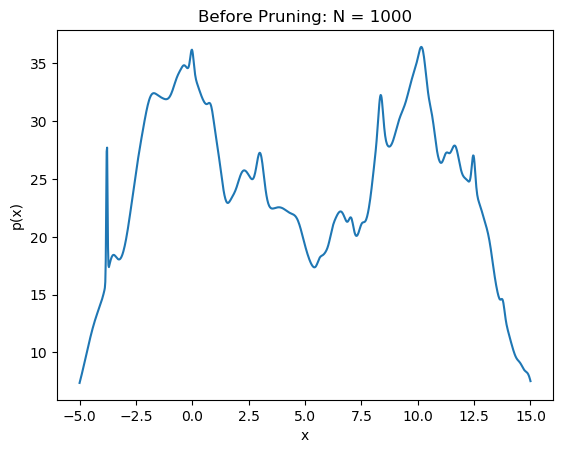

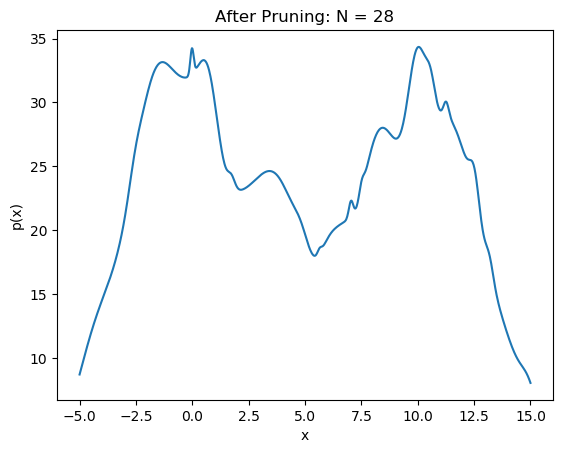

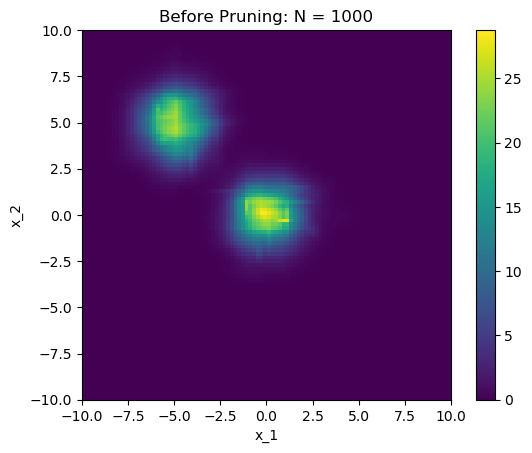

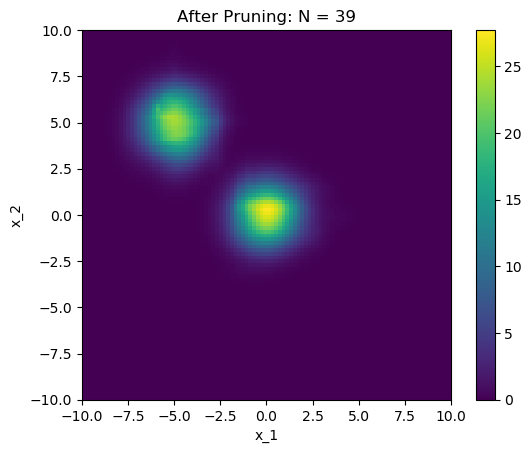

C:\Users\Saint Pablo\.julia\conda\3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


In [5]:
# 1D example
n = 1000

w = rand(n)
mu = vcat([randn(1)*3 for i=1:n/2],[(randn(1)*3).+10 for i=1:n/2])
sigma = [rand(1,1) for i=1:n]

x = GaussianMixture(w,mu,sigma)

T = 0.0			# threshold
U = 10.0		# clustering threshold
J_max = 100

x_new = prune(x,T,U,J_max)

xlim = [-5,15]
resolution = 1000
plot1dGMM(x, xlim, resolution)
title_str = "Before Pruning: N = $(n)"
title(title_str)

plot1dGMM(x_new, xlim, resolution)
title_str = "After Pruning: N = $(length(x_new.w))"
title(title_str)
show()


# 2D example
n = 1000

w = rand(n)
mu = vcat([randn(2) for i=1:n/2],[randn(2).+ [-5,5] for i=1:n/2])
sigma = [Matrix(Diagonal(rand(2))) for i=1:n]

T = 0.0			# threshold
U = 10.0		# clustering threshold
J_max = 100		# maximum number of points

x = GaussianMixture(w, mu, sigma)
x_new = prune(x,T,U,J_max)


xlim = [-10,10]
ylim = [-10,10]
resolution = 100

plot2dGMM(x, xlim, ylim, resolution)
title_str = "Before Pruning: N = $(n)"
title(title_str)

plot2dGMM(x_new, xlim, ylim, resolution)
title_str = "After Pruning: N = $(length(x_new.w))"
title(title_str)
show()


### Extraction Testing

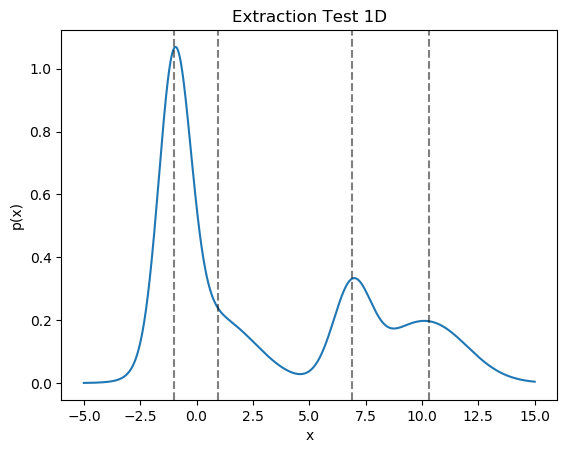

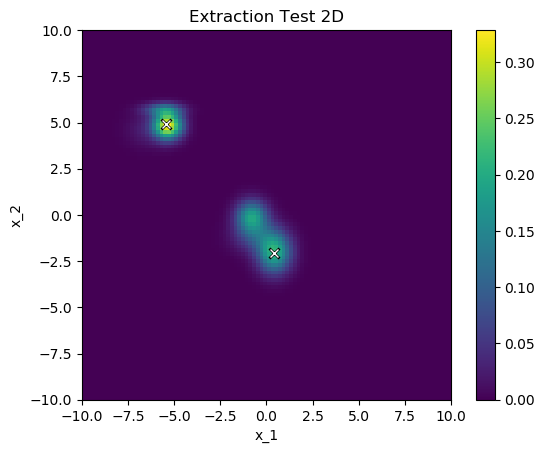

In [6]:
# Generate GMM
n = 6
w = rand(n)*2
mu = vcat([randn(1)*2 for i=1:n/2],[(randn(1)*3).+10 for i=1:n/2])
sigma = [rand(1,1)*3 for i=1:n]
x = GaussianMixture(w,mu,sigma)

# Extraction
mu_arr = multiple_target_state_extraction(x,0.5)

# Plot
resolution = 1000
x_lim = [-5,15]
plot1dGMM(x, x_lim, resolution)
for mu in mu_arr
    gca()[:axvline](mu,color="k",linestyle="--",alpha=0.5)
end
title("Extraction Test 1D")
xlabel("x")
ylabel("p(x)")
show()


## 2D example
# Generate GMM
n = 6
w = rand(n)
mu = vcat([randn(2) for i=1:n/2],[randn(2).+ [-5,5] for i=1:n/2])
sigma = [Matrix(Diagonal(rand(2))) for i=1:n]
x = GaussianMixture(w, mu, sigma)

# Extraction
mu_arr = multiple_target_state_extraction(x,0.5)

# Plot
xlim = [-10,10]
ylim = [-10,10]
resolution = 100
plot2dGMM(x, xlim, ylim, resolution)
for mu in mu_arr
    plot(mu[1],mu[2],"kx",markeredgewidth=2,markersize=7)
    plot(mu[1],mu[2],"wx",markeredgewidth=1,markersize=6)
end
title("Extraction Test 2D")
xlabel("x_1")
ylabel("x_2")
show()
